# Heart disease predicting

 In this machine learnig project  i will be using machine learning algoritem to predict whether  any person  is suffring from heart disease

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import  RandomForestClassifier  

### import dataset and checking 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature selection  

<AxesSubplot:>

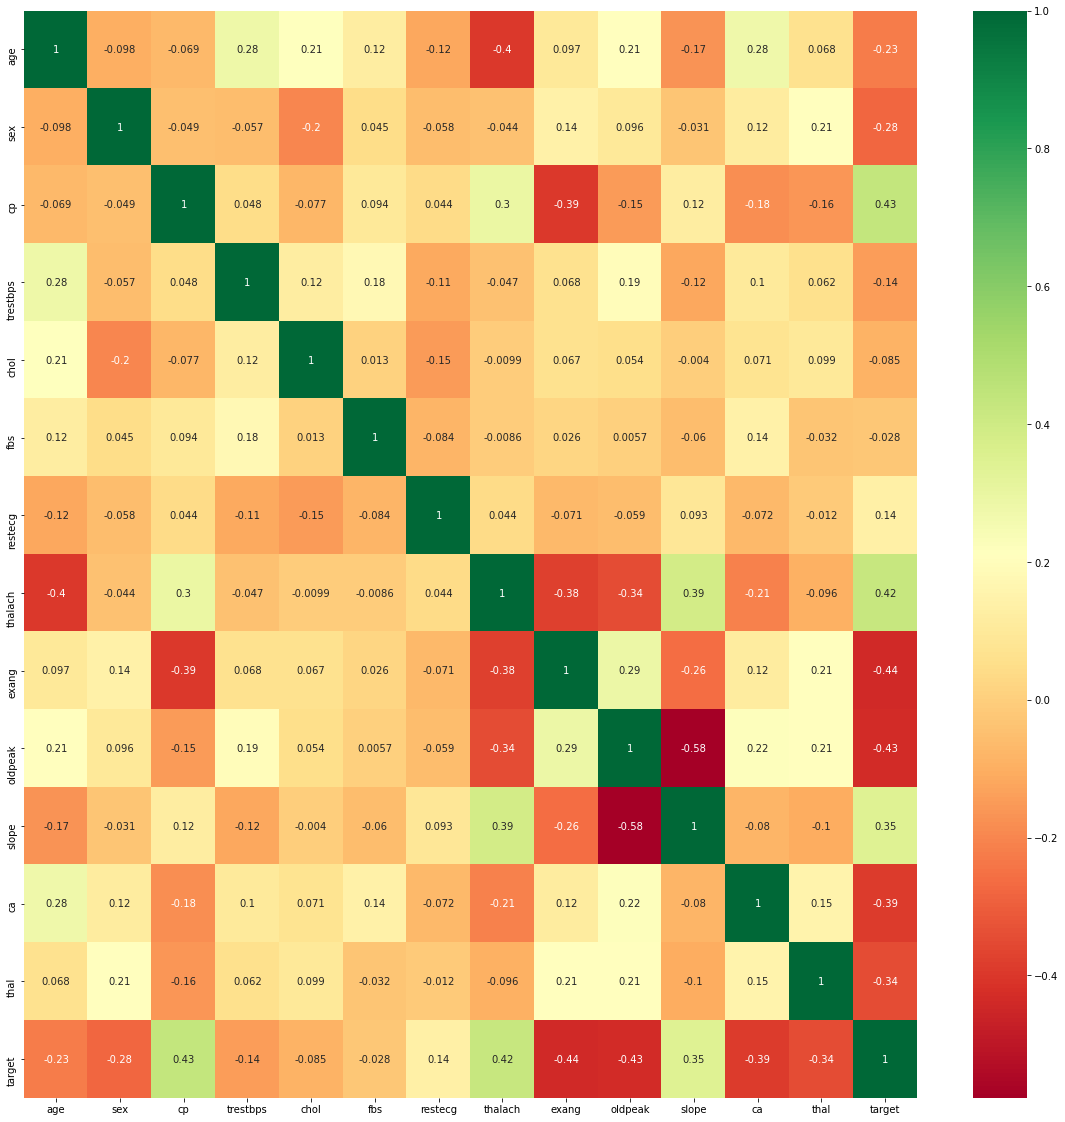

In [5]:
plt.figure(figsize = (20,20))
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot = True  ,cmap="RdYlGn")

<AxesSubplot:xlabel='target', ylabel='count'>

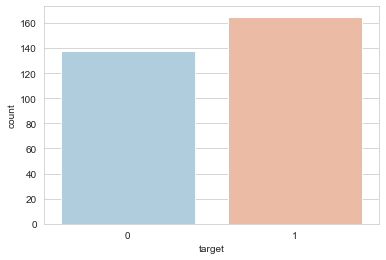

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df , palette='RdBu_r')

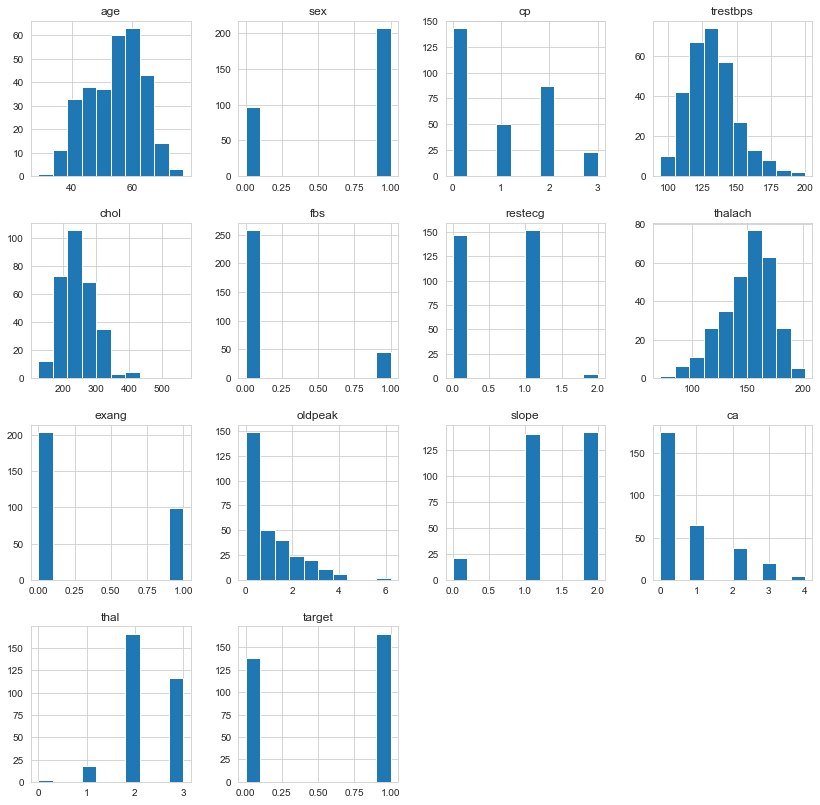

In [7]:

df.hist(figsize=(14,14))
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

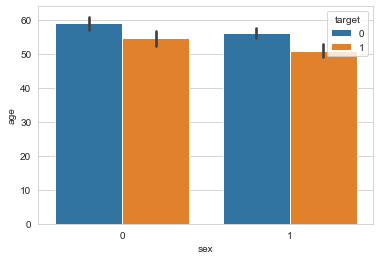

In [8]:
sns.barplot(x=df['sex'],y=df['age'],hue = df['target'])

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

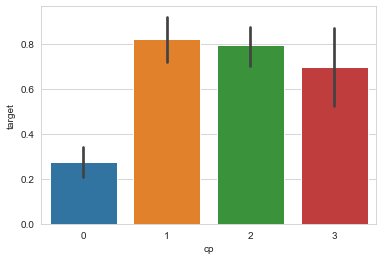

In [9]:
sns.barplot(df["cp"],df['target'])

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

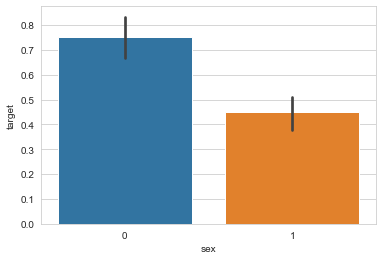

In [10]:
sns.barplot(df["sex"],df['target'])

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

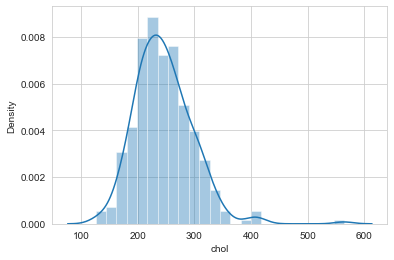

In [11]:
sns.distplot(df["chol"])

In [12]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

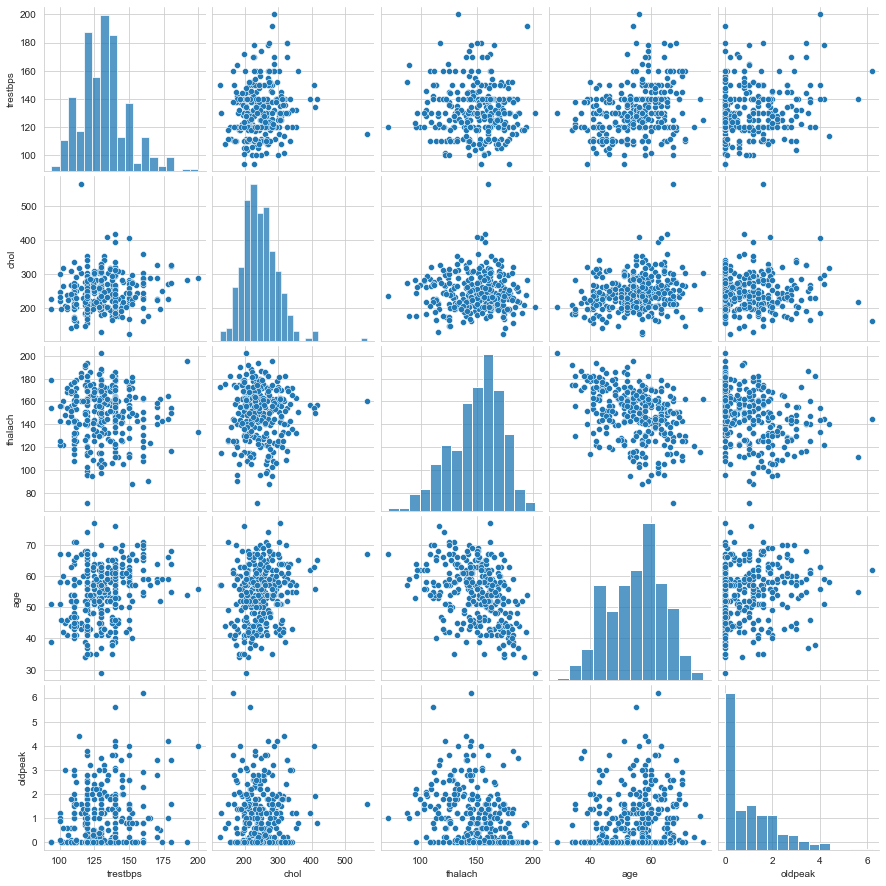

In [13]:
sns.pairplot(df[numeric_columns])

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [14]:
data2 = pd.get_dummies(df,drop_first=True)

In [15]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
y = data2['target']
x = data2.drop(['target'], axis = 1)

# Spliting data into  Train set and Test set

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.25)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
from sklearn.preprocessing import StandardScaler              
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

# Applying KNN MODEL TO know the accuracy 

### Finding K value by elbow method

In [21]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test ,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

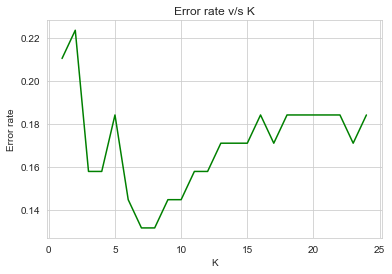

In [22]:
plt.plot(list(range(1,25)),err_list,c= 'g')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

 ### By The gragh will take k value as 7

In [23]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.868421052631579

# Random forest classifier

In [25]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [27]:
score.mean()

0.821505376344086